In [79]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
from citipy import citipy
import openweathermapy.core as owm #https://github.com/crazycapivara/openweathermapy

In [80]:
# Save config information.
api_key = "a195057d622cf9c6c6a687d1e2a7f588"
settings = {"units": "imperial", "appid": api_key}

# Build partial query URL
# query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Define Functions to get City Name, Country Name, and Geocodes of a city

In [70]:
def get_city(city):
    name = city.city_name
    return name
def get_country(city):
    country_code = city.country_code
    return country_code

def get_geocodes(location):
    global coordinates_tup
    try:
        data = owm.get_current(location, **settings)
        lat = data('coord.lat')
        lon = data('coord.lon')
        coordinates_tup = (lat, lon)
    except: # skip that city if error
        pass
    return coordinates_tup



# Generate 500 unique cities and geocodes

In [71]:
coordinates = []
while (len(coordinates) < 500):
    lat = np.random.uniform(-90,90)
    lon = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat, lon)
    city_name = get_city(city)
    country_code = get_country(city)
    geocode = get_geocodes(city_name)
    coordinates.append(geocode)
    coordinates = list(set(coordinates))



# Weather at 500 cities

In [82]:
city_list = []
country_list = []
temp_max_list = []
lat_list = []
lon_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
for location in coordinates:
    data = owm.get_current(location, **settings)
    city_list.append(data('name'))
    country_list.append(data('sys.country'))
    temp_max_list.append(data('main.temp_max'))
    humidity_list.append(data('main.humidity'))
    clouds_list.append(data('clouds.all'))
    wind_speed_list.append(data('wind.speed'))
    lat_list.append(data('coord.lat'))
    lon_list.append(data('coord.lon'))

In [81]:
data

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 60.14, 'lon': -45.24},
 'dt': 1513987877,
 'id': 3421765,
 'main': {'grnd_level': 1002.4,
  'humidity': 93,
  'pressure': 1002.4,
  'sea_level': 1014.73,
  'temp': 30.31,
  'temp_max': 30.31,
  'temp_min': 30.31},
 'name': 'Nanortalik',
 'sys': {'country': 'GL',
  'message': 0.0409,
  'sunrise': 1514030716,
  'sunset': 1514051710},
 'weather': [{'description': 'few clouds',
   'icon': '02n',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 64.0048, 'speed': 23.42}}

# Create a DataFrame

In [83]:
# Create a dataframe
city_data_df = pd.DataFrame({'City': city_list,
                            'Cloudiness': clouds_list,
                            'Country': country_list,
                            'Humidity': humidity_list,
                            'Lat': lat_list,
                            'Lon': lon_list,
                            'Max Temp': temp_max_list,
                            'Wind Speed': wind_speed_list})
city_data_df['Country'] = city_data_df['Country'].str.upper()
city_data_df['City'] = city_data_df['City'].str.title()
city_data_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Alofi,75,NU,94,-19.06,-169.92,75.20,10.29
1,Deputatskiy,36,RU,53,69.30,139.90,-32.34,2.84
2,Londa,0,IN,72,15.34,74.49,59.96,6.02
3,Navrongo,0,GH,25,10.89,-1.09,70.81,10.16
4,Ostrovnoy,8,RU,92,68.05,39.51,16.99,16.60


# Scatter Plots

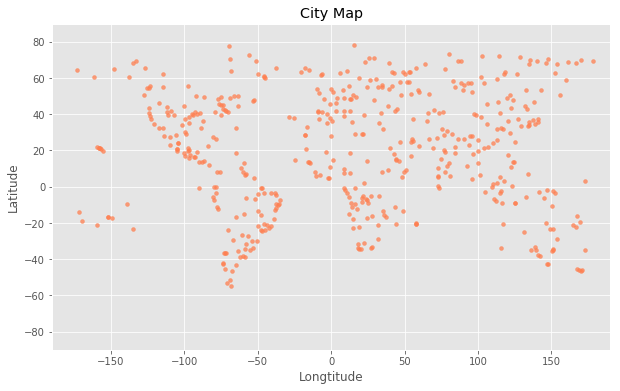

In [84]:
# Map
# Your objective is to build a series of scatter plots to showcase the following relationships:
y_axis = city_data_df['Lat']
# Temperature (F) vs. Latitude
x_axis = city_data_df['Lon']
size = 15

plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis, marker = 'o', c = 'coral', alpha = 0.75, s=size)



plt.title("City Map")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

plt.style.use('ggplot')

plt.ylim(-90, 90)
plt.xlim(-190, 190)

plt.show()

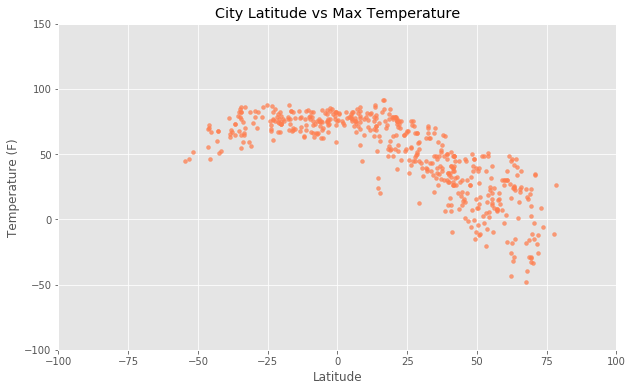

In [85]:
# Your objective is to build a series of scatter plots to showcase the following relationships:
x_axis = city_data_df['Lat']
# Temperature (F) vs. Latitude
y_axis_temp = city_data_df['Max Temp']
size = 15

plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis_temp, marker = 'o', c = 'coral', alpha = 0.75, s = size)

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.style.use('ggplot')

plt.ylim(-100, 150)
plt.xlim(-100, 100)

plt.show()


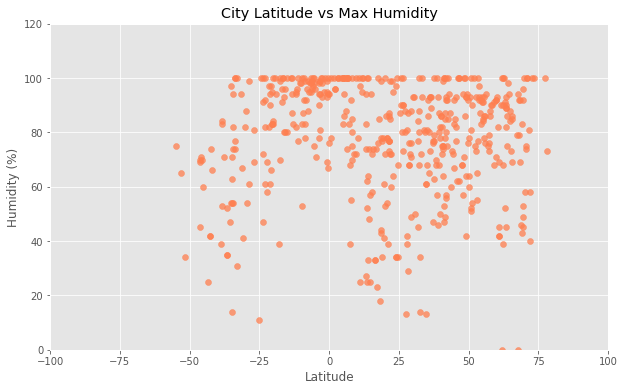

In [86]:
# Humidity (%) vs. Latitude
y_axis_humidity = city_data_df['Humidity']

plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis_humidity, marker = 'o', c = 'coral', alpha = 0.75)

plt.title("City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.style.use('ggplot')

plt.ylim(0, 120)
plt.xlim(-100, 100)

plt.show()


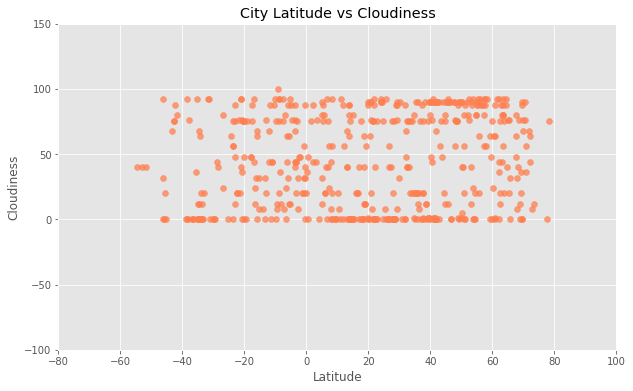

In [87]:
# Cloudiness (%) vs. Latitude
y_axis_cloud = city_data_df['Cloudiness']

plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis_cloud, marker = 'o', c = 'coral', alpha = 0.75)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.style.use('ggplot')

plt.ylim(-100, 150)
plt.xlim(-80, 100)

plt.show()


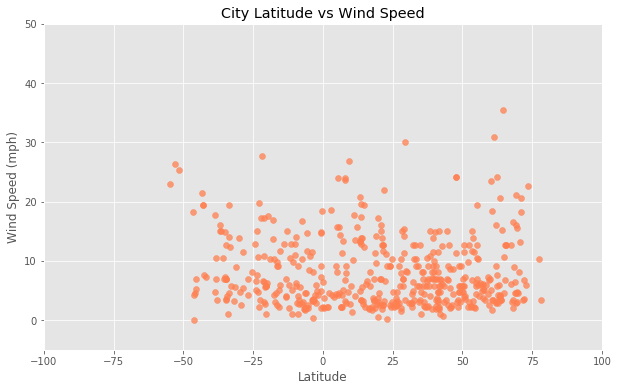

In [88]:
# Wind Speed (mph) vs. Latitude
y_axis_wind = city_data_df['Wind Speed']

plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis_wind, marker = 'o', c = 'coral', alpha = 0.75)

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.style.use('ggplot')

plt.ylim(-5, 50)
plt.xlim(-100, 100)

plt.show()

In [91]:
city_data_df.to_csv('city_data.csv', sep='\t')